In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
import math

In [29]:
data = pd.read_csv('insurance.csv')

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
children = data.drop(['smoker','sex','region'], axis = 1)

In [32]:
children.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [37]:
#string values to float type

In [43]:
children = data.replace('[^\d.]','0', regex=True).astype(float)

# Define x and y

In [44]:
x=children.drop(['bmi'],axis=1).values
y=children['charges'].values

In [45]:
print(x)

[[1.90000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.68849240e+04]
 [1.80000000e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.72555230e+03]
 [2.80000000e+01 0.00000000e+00 3.00000000e+00 0.00000000e+00
  0.00000000e+00 4.44946200e+03]
 ...
 [1.80000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.62983350e+03]
 [2.10000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.00794500e+03]
 [6.10000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.91413603e+04]]


In [46]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


# Split The dataset in training set and test set

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Train the model on the training set

In [48]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

# Predict the test set results

In [49]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 9724.53      8547.6913   45702.02235  12950.0712    9644.2525
  4500.33925   2198.18985  11436.73815   7537.1639    5425.02335
  6753.038    10493.9458    7337.748     4185.0979   18310.742
 10702.6424   12523.6048    3490.5491    6457.8434   33475.81715
 23967.38305  12643.3778   23045.56616  23065.4207    1674.6323
  4667.60765   3732.6251    7682.67      3756.6216    8413.46305
  8059.6791   48970.2476   12979.358    20630.28351  14571.8908
  4137.5227    8347.1643   51194.55914  40003.33225   1880.487
  5458.04645   2867.1196   20149.3229   47496.49445  36149.4835
 26018.95052  19749.38338   6940.90985   4718.20355  22192.43711
  2899.48935  18838.70366  23568.272    46255.1125   24227.33724
  3268.84665   2322.6218    8827.2099   14478.33015  13112.6048
  1253.936    46718.16325  13919.8229    9630.397    10736.87075
  9880.068    32548.3405   38746.3551    3180.5101    8162.71625
 13041.921    11554.2236   16232.847    13887.9685   13012.20865
 13217.0945    7147.105     7731.4

In [54]:
ml.predict([[19,27.900,0,0,0,16884.92400]])

array([16884.924])

# Evaluate the model

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

# Plot the Results

Text(0.5, 1.0, 'Actual vs Predicted')

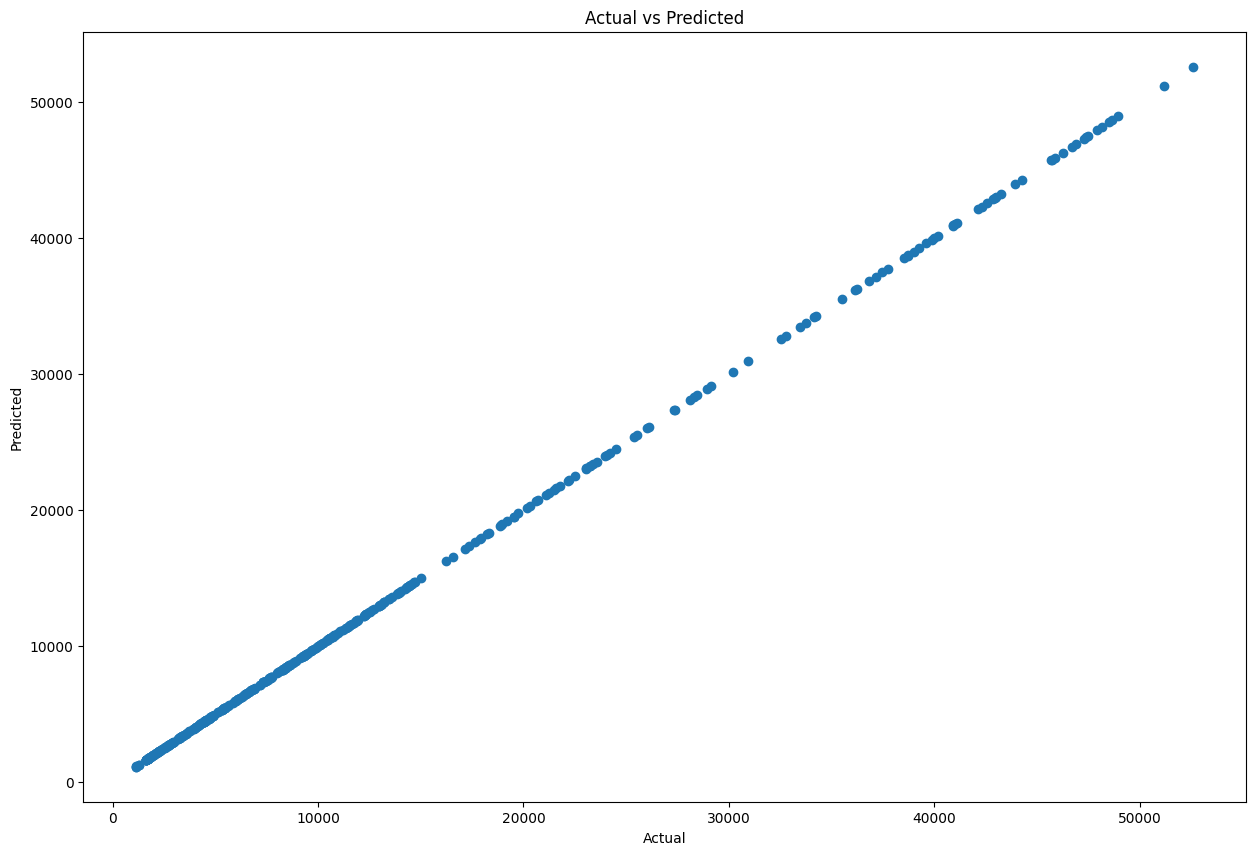

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


# predicted values

In [ ]:
pred_y_df=pd.Dataframe({'Actual value': y_test,'Predicted value':y_pred, 'Difference':y_test=y_pred})